Phase2:

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style('whitegrid')

In [ ]:
df=pd.read_csv('Cleaned_FiverJobsData.csv', on_bad_lines='skip')

In [ ]:
df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,Cetegory,Cetegory.1
3,1266,1253,780,642,0.0,0.0,0.0,0.176407,96,9,16
5,1118,1099,807,641,0.0,0.0,0.0,0.176407,72,6,21
6,1412,1382,417,640,0.0,0.0,0.0,-1.265388,38,9,37
8,773,739,463,639,0.0,0.0,0.0,0.176407,32,9,16
10,32,1511,1513,638,0.0,0.0,0.0,-0.582432,32,9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3235 non-null   object 
 1   link            3235 non-null   object 
 2   description     3235 non-null   object 
 3   published_date  3235 non-null   object 
 4   is_hourly       1367 non-null   float64
 5   hourly_low      1367 non-null   float64
 6   hourly_high     1317 non-null   float64
 7   budget          1365 non-null   float64
 8   country         3174 non-null   object 
 9   Cetegory        791 non-null    object 
 10  Cetegory.1      1554 non-null   object 
dtypes: float64(4), object(7)
memory usage: 278.1+ KB


In [ ]:
df.describe(include='all')

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,Cetegory,Cetegory.1
count,3235,3235,3235,3235,1367.0,1367.000000,1317.000000,1365.000000,3174,791,1554
unique,3140,3235,3231,3108,NaN,NaN,NaN,NaN,120,10,63
top,Virtual Assistant,https://www.upwork.com/jobs/Blog-Writer-for-SE...,#NAME?,2024-02-13 13:56:10+00:00,NaN,NaN,NaN,NaN,United States,Web Development,Marketing
freq,10,1,2,3,NaN,NaN,NaN,NaN,1312,247,256
mean,NaN,NaN,NaN,NaN,1.0,18.219459,44.319666,1295.553114,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.0,19.219434,52.260122,27250.163234,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.0,3.000000,3.000000,5.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.0,8.000000,20.000000,25.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.0,15.000000,33.000000,100.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.0,20.000000,50.000000,250.000000,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
title,0
link,0
description,0
published_date,0
is_hourly,1868
hourly_low,1868
hourly_high,1918
budget,1870
country,61
Cetegory,2444


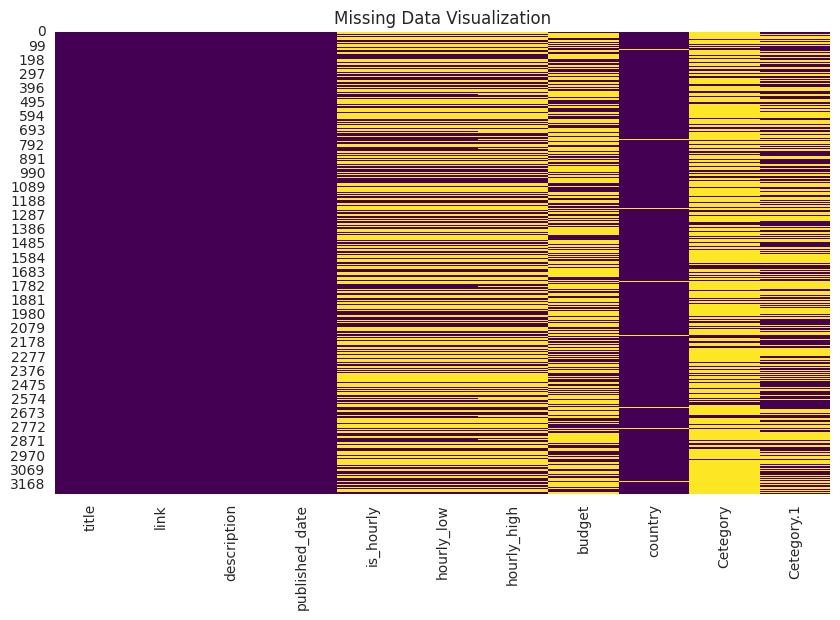

In [ ]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

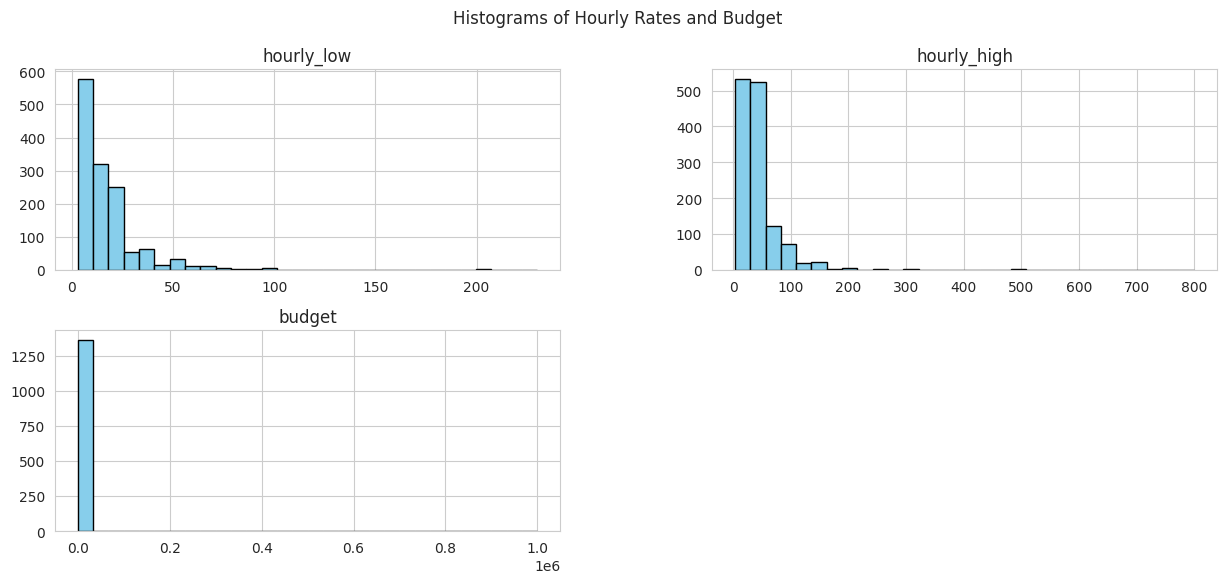

In [ ]:
# Plot histograms for numeric columns
numeric_cols = ['hourly_low', 'hourly_high', 'budget']

df[numeric_cols].hist(bins=30, figsize=(15,6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Hourly Rates and Budget')
plt.show()


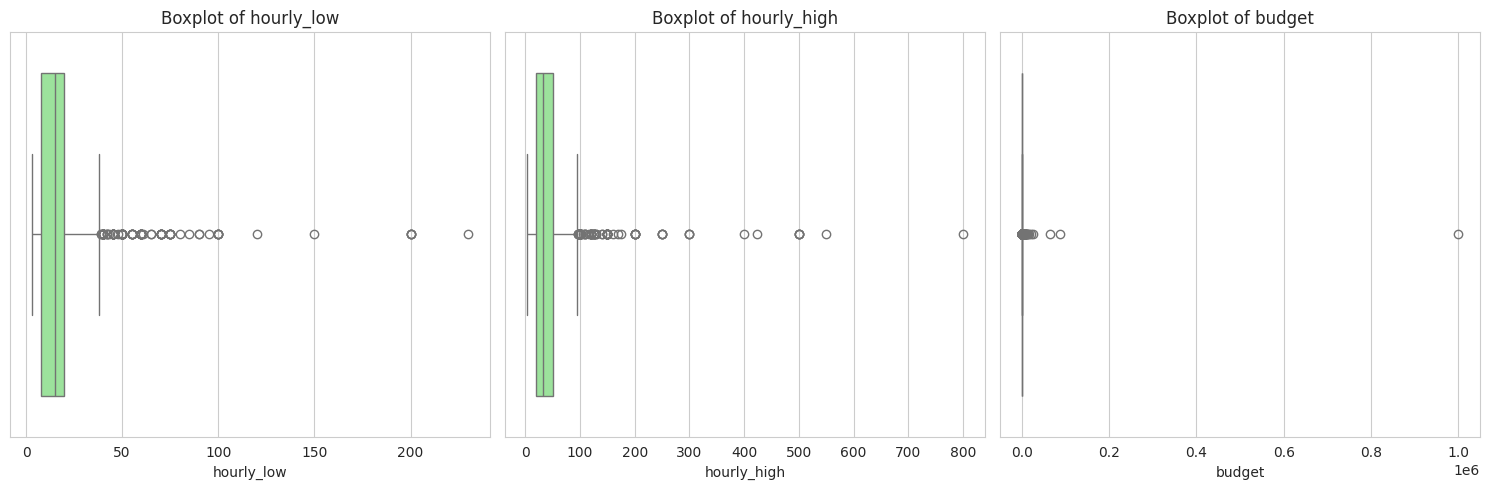

In [ ]:
# Boxplots for numeric columns
plt.figure(figsize=(15,5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Step 4: Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            # Fill categorical columns with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Filled missing values in '{col}' with mode: {df[col].mode()[0]}")
        else:
            # Fill numeric columns with median
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled missing values in '{col}' with median: {df[col].median()}")

# Step 5: Confirm no missing values remain
print("\n✅ Missing values after handling:")
print(df.isnull().sum())


Filled missing values in 'is_hourly' with median: 1.0
Filled missing values in 'hourly_low' with median: 15.0
Filled missing values in 'hourly_high' with median: 33.0
Filled missing values in 'budget' with median: 100.0
Filled missing values in 'country' with mode: United States
Filled missing values in 'Cetegory' with mode: Web Development
Filled missing values in 'Cetegory.1' with mode: Marketing

✅ Missing values after handling:
title             0
link              0
description       0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
Cetegory          0
Cetegory.1        0
dtype: int64


<ipython-input-31-ad77451ec023>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-31-ad77451ec023>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Step 1: Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"🔍 Number of duplicate rows: {duplicate_count}")

# Step 2: Remove duplicates
df = df.drop_duplicates()

# Step 3: Confirm removal
print(f"✅ Shape after removing duplicates: {df.shape}")


🔍 Number of duplicate rows: 0
✅ Shape after removing duplicates: (3235, 11)


🔢 Numeric columns: ['is_hourly', 'hourly_low', 'hourly_high', 'budget']


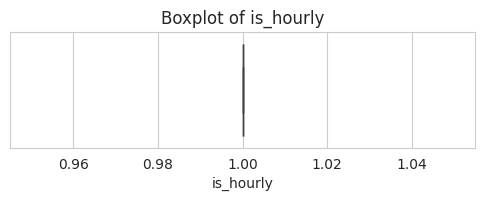

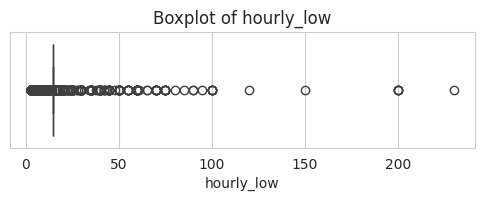

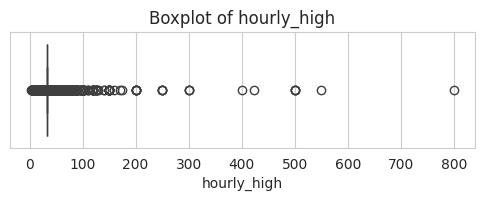

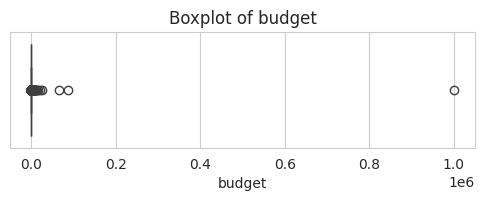


✅ Removed outliers using IQR.
➡️ Shape before: (3235, 11)
➡️ Shape after: (1583, 11)


In [ ]:
# Step 1: Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("🔢 Numeric columns:", numeric_cols)

# Step 2: Visualize with boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Step 3: Remove outliers using IQR method
initial_shape = df.shape

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out rows with outliers
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Step 4: Show final shape
print(f"\n✅ Removed outliers using IQR.")
print(f"➡️ Shape before: {initial_shape}")
print(f"➡️ Shape after: {df.shape}")


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include='number').columns.tolist()

print("🟦 Categorical columns:", categorical_cols)
print("🟨 Numeric columns:", numeric_cols)

# Step 2: Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"✅ Encoded '{col}'")

# Step 3: Scale numeric columns using StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n✅ All numeric features scaled.")
print("\n🔍 Final preview of transformed data:\n")
print(df.head())


🟦 Categorical columns: ['title', 'link', 'description', 'published_date', 'country', 'Cetegory', 'Cetegory.1']
🟨 Numeric columns: ['is_hourly', 'hourly_low', 'hourly_high', 'budget']
✅ Encoded 'title'
✅ Encoded 'link'
✅ Encoded 'description'
✅ Encoded 'published_date'
✅ Encoded 'country'
✅ Encoded 'Cetegory'
✅ Encoded 'Cetegory.1'

✅ All numeric features scaled.

🔍 Final preview of transformed data:

    title  link  description  published_date  is_hourly  hourly_low  \
3    1266  1253          780             642        0.0         0.0   
5    1118  1099          807             641        0.0         0.0   
6    1412  1382          417             640        0.0         0.0   
8     773   739          463             639        0.0         0.0   
10     32  1511         1513             638        0.0         0.0   

    hourly_high    budget  country  Cetegory  Cetegory.1  
3           0.0  0.176407       96         9          16  
5           0.0  0.176407       72         6       

PHASE4

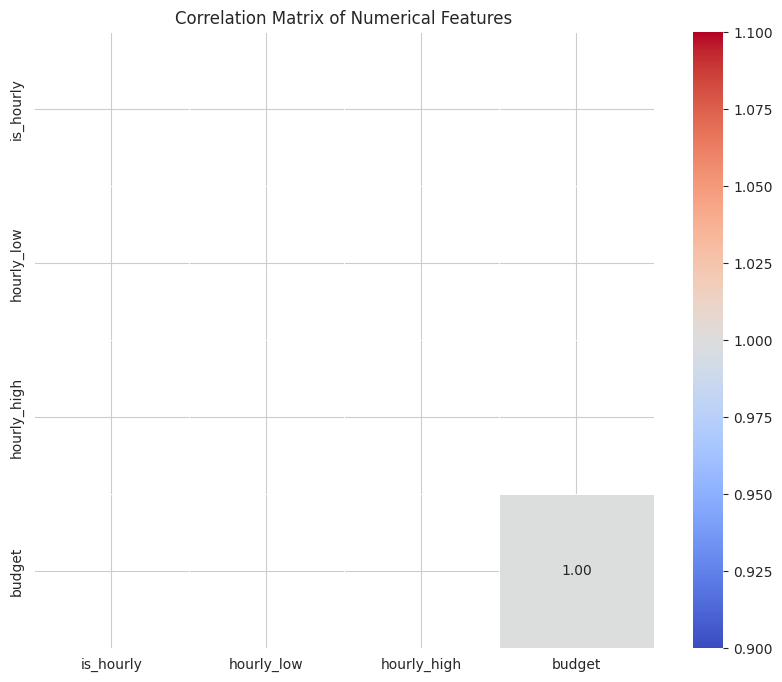

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix for numerical columns
correlation_matrix = df[numeric_cols].corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Significant Correlations (absolute value > 0.7):
             is_hourly  hourly_low  hourly_high  budget  Unnamed: 9
is_hourly          NaN         NaN          NaN     NaN         NaN
hourly_low         NaN         NaN          NaN     NaN         NaN
hourly_high        NaN         NaN          NaN     NaN         NaN
budget             NaN         NaN          NaN     NaN         NaN
Unnamed: 9         NaN         NaN          NaN     NaN         NaN


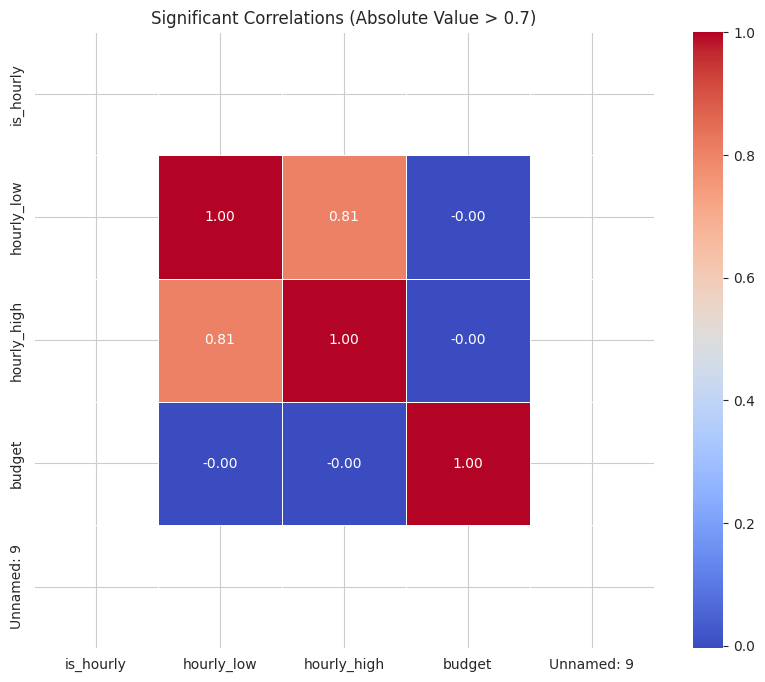

In [ ]:
# Step 1: Calculate the correlation matrix for numerical columns
correlation_matrix = df[numeric_cols].corr()

# Step 2: Set a correlation threshold to identify significant correlations
threshold = 0.7

# Step 3: Find pairs of features with correlation greater than the threshold (both positive and negative)
significant_correlations = correlation_matrix.abs() > threshold

# Step 4: Create a mask to ignore the diagonal (self-correlation) and show only the pairs
mask = significant_correlations & (significant_correlations != 1)

# Step 5: Print out the significant correlations
significant_pairs = correlation_matrix[mask]
print("Significant Correlations (absolute value > 0.7):")
print(significant_pairs)

# Step 6: Optionally, visualize the significant correlations as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)
plt.title("Significant Correlations (Absolute Value > 0.7)")
plt.show()
